# Effects of Basis Set Size: The Molecular Case


In this exercise you will compute the equilibrium energy of
H$_2$ at the Hartree-Fock level using different basis sets, i.e. the 6-31G and 6-311G sets (with which you are familiar from last week), as well as Dunning's
correlation-consistent aug-cc-pVTZ basis. Correlation-consistent basis
sets were defined such that systematic improvement over total energies
and molecular properties is possible. 

First again we again import the required modules:

In [1]:
import psi4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 

sys.path.append("..")
from helpers import *

then we set the maximum ressources that can be used

In [2]:
psi4.set_memory('2 GB')
psi4.set_num_threads(4)


  Memory set to   1.863 GiB by Python driver.
  Threads set to 4 by Python driver.


next we define our $H_2$ geometry, setting the H molecules at equilibrium distance of each other, i.e. 0.7414Å. We are using XYZ coordinates for the `psi4.geometry`, but as you saw last week also Z-matrix geometries can be used here.

In [3]:
h2 = psi4.geometry("""
0 1
H 0.0 0.0 0.0
H 0.0 0.0 0.7414
""")


We can have a look at out molecule using the helper function `drawXYZ`, to double-check everything looks fine

In [4]:
drawXYZ(h2)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Edit the code cell below to compute the energy (using `psi4.energy()` funciton) for the different basis sets selected

In [5]:
basissets = ['6-31G', '6-311G', 'aug-cc-pvtz'] # these are the basis sets we are going to use

psi4.set_options({'reference':'UHF'}) # We are using Unrestriced Hartee Fock

for basis in basissets:
    psi4.core.set_output_file(f'{basis}-output.log', False) # save in seperate log files
    E = psi4.energy(f'hf/{basis}', molecule=h2)    # EDIT HERE
                # we want to perform a single point energy calculation once per basis set

    print(basis, E)

6-31G -1.126735094476615
6-311G -1.1279712477294033
aug-cc-pvtz -1.1330222127939675


```{admonition} Exercise 1
:class: exercise
Include a table of the the calculated energies using the three different basis sets
```

Lets have a look at one of the outputs (e.g for the `6-31G` basis). We can use the shell command `!grep -options SEARCHTERM FILENAME` for this. (Remember: The `!` denotes that this is not a python command but a bash program.) 

As the SCF procedure is iterative we can search for the word `iter` in the output. By including `-A 1 -B 3` we get 1 line after the last find and 3 lines before the first find, which contain some helpful context to make sense of the results. 

In [6]:
!grep -A 1 -B 3 iter 6-31G-output.log


                           Total Energy        Delta E     RMS |[F,P]|

   @DF-UHF iter SAD:    -0.85212229561043   -8.52122e-01   0.00000e+00 
   @DF-UHF iter   1:    -1.12493424123816   -2.72812e-01   1.62339e-02 DIIS/ADIIS
   @DF-UHF iter   2:    -1.12669596352818   -1.76172e-03   2.38980e-03 DIIS/ADIIS
   @DF-UHF iter   3:    -1.12673508620576   -3.91227e-05   3.47328e-05 DIIS
   @DF-UHF iter   4:    -1.12673509447662   -8.27086e-09   2.87998e-08 DIIS
  Energy and wave function converged.


```{admonition} Exercise 2
:class: exercise
What is the meaning of the Delta E column? What is DIIS? (Hint: to get more details, it may help to check the [HF page on psi4 manual](https://psicode.org/psi4manual/master/scf.html))
```

Next, let's plot the SCF convergence for the three tested basis sets. You can use a little helper function called `psi4_read_scf` which will read in the table shown above and return it to you as pandas dataframe that you can easily plot. 

In [10]:
# Read in scf table like so:

# Syntax of psi4_read_scf function:
g631 = psi4_read_scf('6-31G-output.log')

# to view the table you can simply type the name of the DataFrame, i.e.:
g631

,iteration,Total Energy,Delta E,"RMS |[F,P]|"
0,SAD:,-0.852122,-8.521220e-01,0.000000e+00
1,1:,-1.124934,-2.728120e-01,1.623390e-02
2,2:,-1.126696,-1.761720e-03,2.389800e-03
3,3:,-1.126735,-3.912270e-05,3.473280e-05
4,4:,-1.126735,-8.270860e-09,2.879980e-08


In [11]:
# Syntax of psi4_read_scf function:
g6311 = psi4_read_scf('6-311G-output.log')

# to view the table you can simply type the name of the DataFrame, i.e.:
g6311

,iteration,Total Energy,Delta E,"RMS |[F,P]|"
0,SAD:,-0.842460,-8.424600e-01,0.000000e+00
1,1:,-1.124733,-2.822720e-01,1.164020e-02
2,2:,-1.127828,-3.095000e-03,2.374460e-03
3,3:,-1.127971,-1.428290e-04,1.805220e-04
4,4:,-1.127971,-5.651250e-07,2.421710e-06
5,5:,-1.127971,-1.208300e-10,1.020420e-08


In [12]:
# Syntax of psi4_read_scf function:
aug = psi4_read_scf('aug-cc-pvtz-output.log')

# to view the table you can simply type the name of the DataFrame, i.e.:
aug

,iteration,Total Energy,Delta E,"RMS |[F,P]|"
0,SAD:,-0.836621,-8.366210e-01,0.000000e+00
1,1:,-1.129697,-2.930750e-01,2.525840e-03
2,2:,-1.132852,-3.155430e-03,5.602550e-04
3,3:,-1.133021,-1.692670e-04,4.701620e-05
4,4:,-1.133022,-9.240030e-07,2.040380e-06
5,5:,-1.133022,-1.639640e-09,1.450090e-07


For the plotting we will use matplotlib. We will also include in the plot the exact value. As explained in the introduction, this was obtained with a post-Hartree Fock calculation, and its value for the H$_2$ molecule is $E_{exact} = -1.174474{}$ a.u.

In particular, we suggest you to produce two plots, one with the full set of points, and the other one excluding the first SCF iteration. This can help you to appreciate the differences between the three basis sets. In the cell code below, we already set both subplots. Edit the code in order to plot the results for the three basis sets.

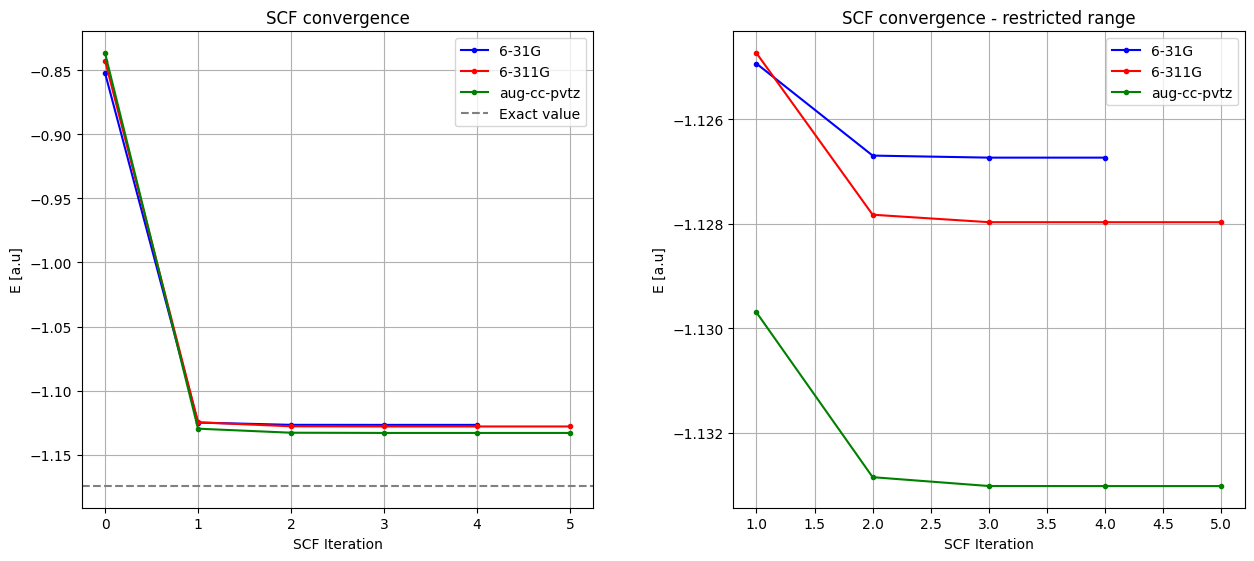

In [18]:
# Subplot 1: full data and exact value reference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7)) # create figure with two subplots
fig.tight_layout(pad=7.0) # add spacing between subplots
# we use the table index and the Total Energy column for plotting
ax1.plot(g631.index, g631['Total Energy'], 'b.-', label='6-31G')
ax1.plot(g6311.index, g6311['Total Energy'], 'r.-', label='6-311G')
ax1.plot(aug.index, aug['Total Energy'], 'g.-', label='aug-cc-pvtz')
ax1.set_xlabel('SCF Iteration') # set axis labels and title
ax1.set_ylabel('E [a.u]')
ax1.set_title('SCF convergence')
ax1.axhline(-1.174474, label='Exact value', linestyle='--', color='gray') # horizontal line for the exact energy
ax1.legend() # show legend
ax1.grid()
# Subplot 2: excluding first SCF point to focus on the difference along SCF cycles
# you can exclude the first point of an array just by [1:]. This will select all points from 1 (so excluding 0) to the end
ax2.plot(g631.index[1:], g631['Total Energy'][1:], 'b.-', label='6-31G')
ax2.plot(g6311.index[1:], g6311['Total Energy'][1:], 'r.-', label='6-311G')
ax2.plot(aug.index[1:], aug['Total Energy'][1:], 'g.-', label='aug-cc-pvtz')
ax2.set_xlabel('SCF Iteration') # set axis labels
ax2.set_ylabel('E [a.u]')
ax2.set_title('SCF convergence - restricted range')
ax2.legend() # show legend
ax2.grid()
plt.show()

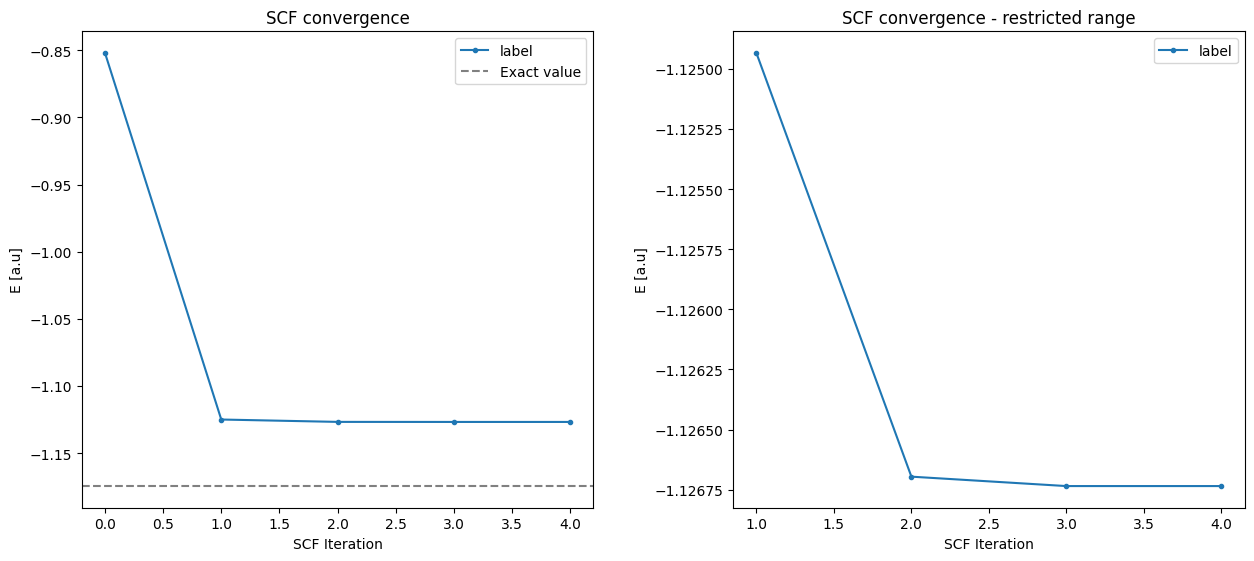

In [22]:
# Subplot 1: full data and exact value reference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7)) # create figure with two subplots
fig.tight_layout(pad=7.0) # add spacing between supblots 

# we use the table index and the Total Energy column for plotting
# repeat the following command once per basis set to have all on the same plot
ax1.plot(g631.index, g631['Total Energy'], '.-', label='label') 

ax1.set_xlabel('SCF Iteration') # set axis labels and title
ax1.set_ylabel('E [a.u]')
ax1.set_title('SCF convergence')

ax1.axhline(-1.174474, label='Exact value', linestyle='--', color='gray') # horizontal line for the exact energy

ax1.legend() # show legend

# Subplot 2: excluding first SCF point to focus on the difference along SCF cycles
# you can exclud the first point of an array just by [1:]. This will select all point from 1 (so excluding 0) to the end
# example: array DATA --> DATA[1:]
# repeat the following command once per basis set to have all on the same plot
ax2.plot(g631.index[1:], g631['Total Energy'][1:], '.-', label='label') 

ax2.set_xlabel('SCF Iteration') # set axis labels
ax2.set_ylabel('E [a.u]')
ax2.set_title('SCF convergence - restricted range')

ax2.legend() # show legend
plt.show()

```{admonition} Exercise 3
:class: exercise
How does the basis set size influence the SCF convergence behaviour? Include in your report the plot of the energy convergence along SCF iterations. 
```